# Gradient Bandit Algorithm

## Soft-Max Distribution
(also called Gibbs or Boltzman Distribution)

In [31]:
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [32]:
#x = np.array([4,6,2,8])
x = np.random.normal(4,1,10)
print(x)
s = softmax(x)

[4.21868939 5.01809741 4.92250535 4.57103791 4.51545186 3.58466196
 5.07915851 4.28484322 4.41107333 3.11684218]


In [398]:
z=[5.9,6.9]
softmax(z)

array([0.26894142, 0.73105858])

In [33]:
np.sum(s)

1.0

In [34]:
print(s)

[0.07395859 0.16450046 0.14950372 0.10519901 0.09951096 0.03923142
 0.17485804 0.0790167  0.08964786 0.02457324]


In [399]:
sum(s)

1.0

<Axes: >

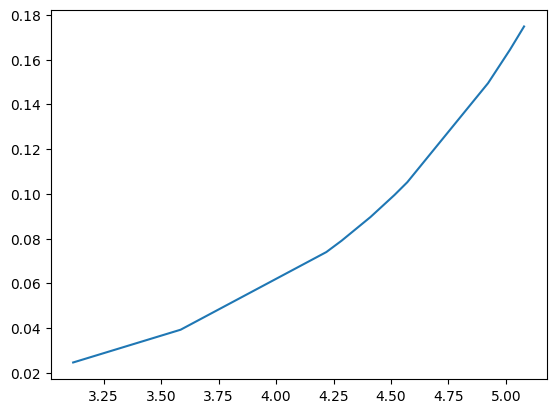

In [35]:
sns.lineplot(x=x, y=s)

In [36]:
np.exp(x)

array([ 67.94437726, 151.12350449, 137.34628311,  96.64436544,
        91.41886553,  36.0411723 , 160.63882294,  72.59116503,
        82.35781304,  22.57497916])

In [37]:
np.sum(np.exp(x))

918.6813482957128

In [38]:
y = np.exp(x)/np.sum(np.exp(x))

<Axes: >

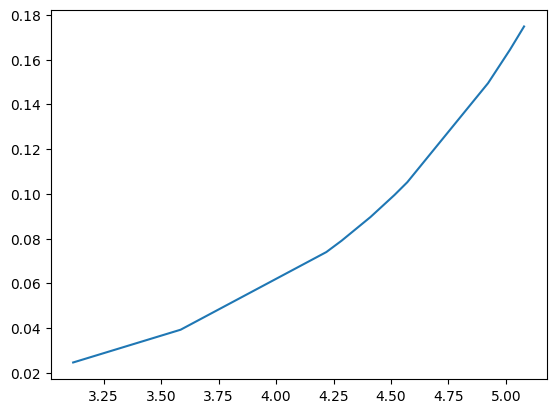

In [39]:
sns.lineplot(x=x, y=y)

In [40]:
def my_softmax(x):
    y = np.exp(x)/np.sum(np.exp(x))
    return y

<Axes: >

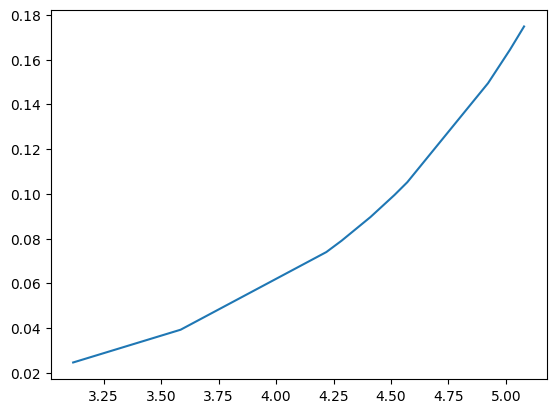

In [41]:
y = my_softmax(x)
sns.lineplot(x=x, y=y)

## Gradient Bandit Algorithm

<img src="images/GradientBanditAlgo.png" alt="GB Eq" style="width: 800px;"/>

In [367]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [278]:
k=10
#Initialize true value for each action
q_star_a = np.random.normal(4,1,k)
print(q_star_a)
H_t = np.array([0.0]*k)
print(H_t)

rewards_seq=[]
reward_baseline = 0

alpha = 0.1

num_steps = 500

[4.11003483 4.65007587 4.43684243 4.48093916 4.04470012 3.95614669
 4.16039858 5.58527271 4.51997444 4.39338183]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [234]:
print(q_star_a)

[4.52338264 2.84771756 5.195832   3.87095161 4.24477307 4.46072166
 4.23252034 2.4594605  3.79329717 4.17145387]


True Q values: [4.57368299 4.01574994 1.93465393 3.05138902 4.27966468 3.42166072
 3.44497982 3.69979465 3.31362918 2.86604481]
num bandits x num steps : (2000, 1000)
True Q values: [4.57368299 4.01574994 1.93465393 3.05138902 4.27966468 3.42166072
 3.44497982 3.69979465 3.31362918 2.86604481]
num bandits x num steps : (2000, 1000)
True Q values: [4.57368299 4.01574994 1.93465393 3.05138902 4.27966468 3.42166072
 3.44497982 3.69979465 3.31362918 2.86604481]
num bandits x num steps : (2000, 1000)
True Q values: [4.57368299 4.01574994 1.93465393 3.05138902 4.27966468 3.42166072
 3.44497982 3.69979465 3.31362918 2.86604481]
num bandits x num steps : (2000, 1000)
True Q values: [4.57368299 4.01574994 1.93465393 3.05138902 4.27966468 3.42166072
 3.44497982 3.69979465 3.31362918 2.86604481]
num bandits x num steps : (2000, 1000)


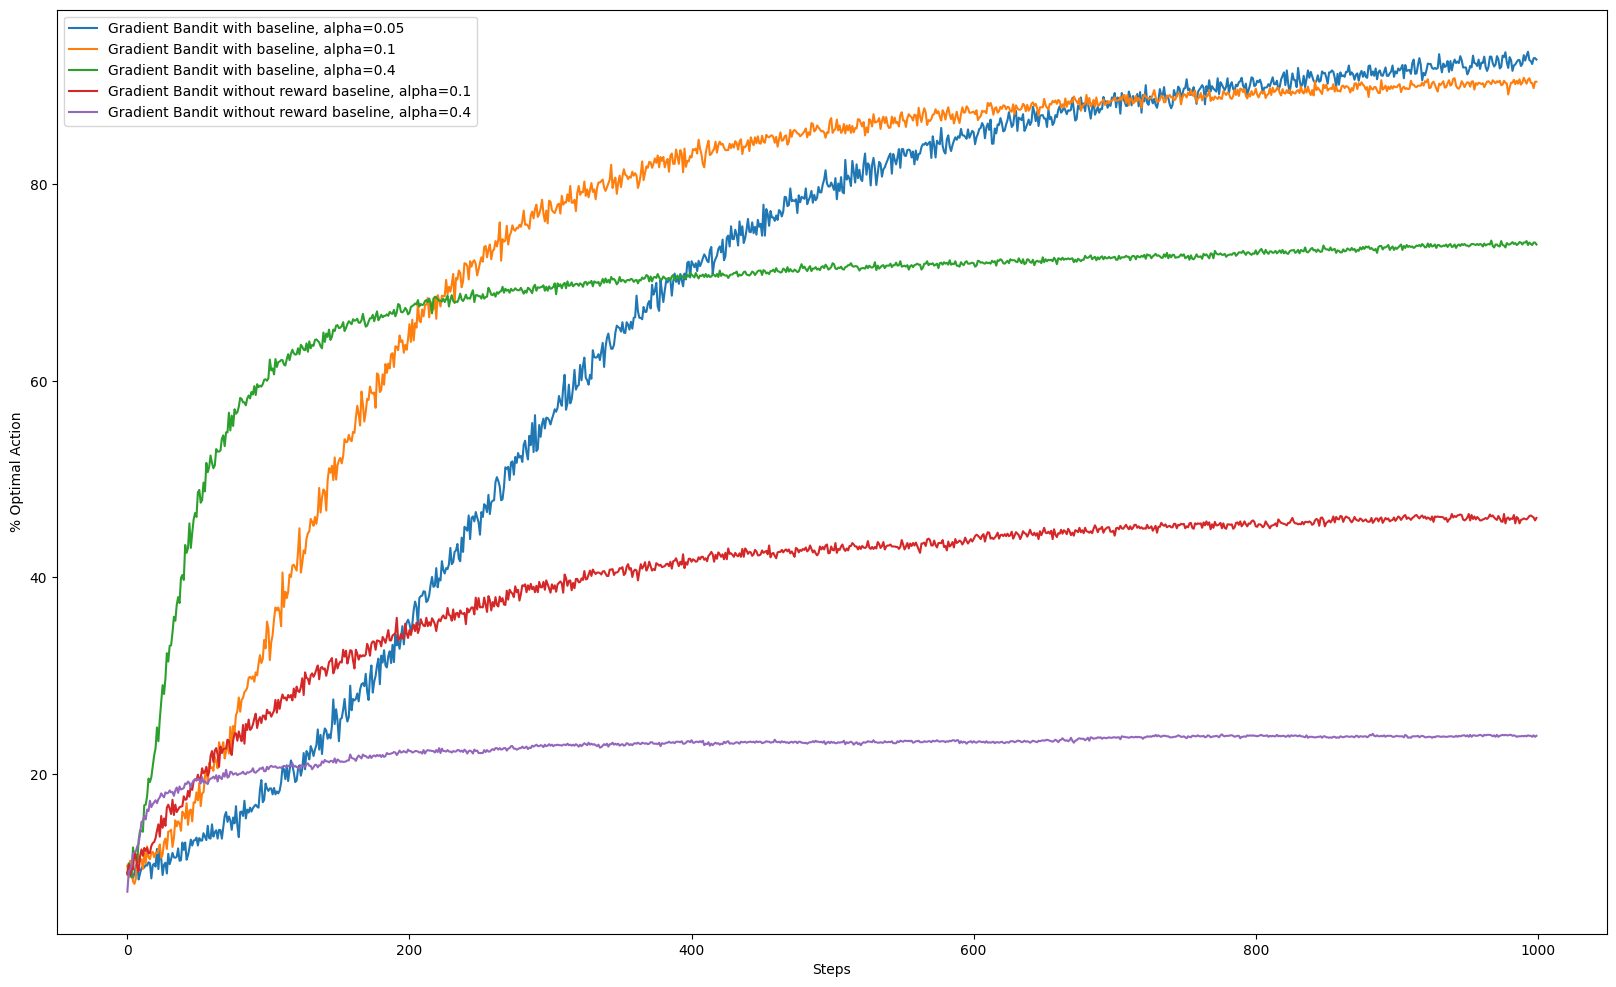

In [304]:


def select_action(k,prob) -> int:
    selected_action = np.random.choice(range(k),p=prob)
    return selected_action

def get_reward(q_star_a,a):
    #each reward for the action will come fromthe prob distribution of that action
    #which has a mean of q*(a) and variance of 1
    #add_random_walk()
    reward = np.random.normal(q_star_a[a],1) 
    return reward

def calc_reward_baseline(reward_baseline,step,reward):
    if step>0:
        reward_baseline = (reward_baseline*(step-1) + reward)/step
    else:
        reward_baseline = 0
    return reward_baseline

def update_numerical_preference(H_t,k,selected_action,reward,reward_baseline,alpha):
    for action in range(k):
        if action == selected_action:
            H_t[selected_action] = H_t[selected_action] + alpha*(reward - reward_baseline)*(1-softmax(H_t)[selected_action])
        else:
            H_t[action] = H_t[action] - alpha*(reward - reward_baseline)*(softmax(H_t)[action])
    return H_t

def one_step(q_star_a,step_num,H_t,reward_baseline=0,alpha=0.1,with_reward_baseline=True):
    selected_action = select_action(k,softmax(H_t))
    optimal_action = 0
    if selected_action == np.argmax(q_star_a) :
            optimal_action = 1
    reward = get_reward(q_star_a,selected_action)
    if with_reward_baseline:
        reward_baseline = calc_reward_baseline(reward_baseline,step_num,reward)
    else:
        reward_baseline = 0
    H_t = update_numerical_preference(H_t,k,selected_action,reward,reward_baseline,alpha)
    return H_t,reward_baseline,optimal_action

def one_run(n_steps,q_star_a,H_t,with_reward_baseline,alpha):
    reward_baseline = 0
    optimal_action_seq = []
    optimal_action_count = 0
    for step_num in range(1,n_steps+1):
        H_t,reward_baseline,optimal_action = one_step(q_star_a,step_num,H_t,reward_baseline,alpha,with_reward_baseline)
        optimal_action_count += 1
        optimal_action_seq.append(optimal_action)
    return optimal_action_seq


def run_bandit(q_star_a=np.random.normal(4,1,k),n_bandits=2000,n_steps=1000,alpha=0.1,with_reward_baseline=True,k=10):
    o_a_runs = np.zeros((n_bandits,n_steps))
    #Initialize true value for each action
    #q_star_a = np.random.normal(4,1,k)
    print(f"True Q values: {q_star_a}")
    
    #print(H_t)
    #optimal_action_seq = []
    for run in range(n_bandits):
        H_t = np.array([0.0]*k)
        o_a_runs[run] = one_run(n_steps=n_steps,q_star_a=q_star_a,H_t=H_t,with_reward_baseline=with_reward_baseline,alpha=alpha)
        #print(optimal_action_seq)
        #o_a_runs[run] = optimal_action_seq

    #o_values= np.array(o_a_runs)
    print(f"num bandits x num steps : {o_a_runs.shape}")
    optimal_action_perc = np.mean(o_a_runs,axis=0) * 100
    #print(optimal_action_perc)
    return optimal_action_perc

n_bandits = 2000
n_steps=1000
q_star_a = np.random.normal(4,1,k)
optimal_action_perc = run_bandit(q_star_a=q_star_a,n_bandits=n_bandits,n_steps=n_steps,alpha=0.05,with_reward_baseline=True)
plt.plot(optimal_action_perc,label='Gradient Bandit with baseline, alpha=0.05');
optimal_action_perc = run_bandit(q_star_a=q_star_a,n_bandits=n_bandits,n_steps=n_steps,alpha=0.1,with_reward_baseline=True)
plt.plot(optimal_action_perc,label='Gradient Bandit with baseline, alpha=0.1');
optimal_action_perc = run_bandit(q_star_a=q_star_a,n_bandits=n_bandits,n_steps=n_steps,alpha=0.4,with_reward_baseline=True)
plt.plot(optimal_action_perc,label='Gradient Bandit with baseline, alpha=0.4');
optimal_action_perc = run_bandit(q_star_a=q_star_a,n_bandits=n_bandits,n_steps=n_steps,alpha=0.1,with_reward_baseline=False)
plt.plot(optimal_action_perc,label='Gradient Bandit without reward baseline, alpha=0.1');
optimal_action_perc = run_bandit(q_star_a=q_star_a,n_bandits=n_bandits,n_steps=n_steps,alpha=0.4,with_reward_baseline=False)
plt.plot(optimal_action_perc,label='Gradient Bandit without reward baseline, alpha=0.4');
plt.ylabel("% Optimal Action")
plt.xlabel("Steps")
plt.legend();

In [389]:
class GradientBandit():
    def __init__(self,q_star_a,k=10,n_bandits=500,n_steps=500,alpha=0.1,with_reward_baseline=True):
        self.k = k
        self.n_bandits = n_bandits
        self.n_steps = n_steps
        self.alpha = alpha
        self.with_reward_baseline = with_reward_baseline


        self.q_star_a = q_star_a
        #print(self.q_star_a)
        self.H_t = np.array([0.0]*k)
        #print(self.H_t)
        self.reward_baseline = 0.0

    def select_action(self) -> int:
        selected_action = np.random.choice(range(self.k),p=softmax(self.H_t))
        return selected_action


    def get_reward(self,a):
        #each reward for the action will come from the prob distribution of that action
        #which has a mean of q*(a) and variance of 1
        reward = np.random.normal(self.q_star_a[a],1) 
        return reward
    
    def calc_reward_baseline(self,step,reward):
        if step>0:
            self.reward_baseline = (self.reward_baseline*(step-1) + reward)/step
        else:
            self.reward_baseline = 0
        return reward_baseline
    
    def update_numerical_preference(self,selected_action,reward):
        for action in range(self.k):
            if action == selected_action:
                self.H_t[selected_action] = self.H_t[selected_action] + self.alpha*(reward - self.reward_baseline)*(1-softmax(self.H_t)[selected_action])
            else:
                self.H_t[action] = self.H_t[action] - self.alpha*(reward - self.reward_baseline)*(softmax(self.H_t)[action])
        return H_t

    def one_step(self,step_num):
        selected_action = self.select_action()
        optimal_action = 0
        if selected_action == np.argmax(self.q_star_a) :
                optimal_action = 1
        reward = self.get_reward(selected_action)
        if self.with_reward_baseline:
            self.calc_reward_baseline(step_num,reward)
        else:
            self.reward_baseline = 0
        self.update_numerical_preference(selected_action,reward)
        return optimal_action

    def one_run(self):
        #self.reward_baseline = 0
        optimal_action_seq = []
        optimal_action_count = 0
        for step_num in range(1,self.n_steps+1):
            optimal_action = self.one_step(step_num)
            optimal_action_count += 1
            optimal_action_seq.append(optimal_action)
        return optimal_action_seq

    def run_bandit(self):
        o_a_runs = np.zeros((self.n_bandits,self.n_steps))

        print(f"True Q values: {self.q_star_a}")
        for run in range(self.n_bandits):
            self.H_t = np.array([0.0]*self.k)
            o_a_runs[run] = self.one_run()
    
        print(f"num bandits x num steps : {o_a_runs.shape}")
        optimal_action_perc = np.mean(o_a_runs,axis=0) * 100
        return optimal_action_perc

In [364]:
# grad_bandit_1 = GradientBandit(n_bandits=2000,n_steps=1000)
# optimal_action_perc = grad_bandit_1.run_bandit()

In [393]:
def run_experiment(k=10,n_bandits=500,n_steps=500,alpha=[0.05,0.1,0.4]):
    optimal_action_perc_dict = {}
    q_star_a = np.random.normal(4,1,k)
    for bandit_n in range(len(alpha)):
        bandit_wrb_T = GradientBandit(q_star_a,k,n_bandits,n_steps,alpha[bandit_n],with_reward_baseline=True)
        bandit_wrb_F = GradientBandit(q_star_a,k,n_bandits,n_steps,alpha[bandit_n],with_reward_baseline=False)

        key = "Gradient bandit with alpha="+str(alpha[bandit_n])+" with Reward Baseline"
        optimal_action_perc_dict[key] = bandit_wrb_T.run_bandit()
        key = "Gradient bandit with alpha="+str(alpha[bandit_n])+" without Reward Baseline"
        optimal_action_perc_dict[key] = bandit_wrb_F.run_bandit()
        
        
    return optimal_action_perc_dict
        

In [394]:
optimal_action_perc_dict = run_experiment(n_bandits=2000,n_steps=1000)

True Q values: [2.89216417 4.85217751 4.25070295 2.20437039 4.30057382 3.62725455
 3.08710083 4.01998792 4.79938576 4.70258279]
num bandits x num steps : (2000, 1000)
True Q values: [2.89216417 4.85217751 4.25070295 2.20437039 4.30057382 3.62725455
 3.08710083 4.01998792 4.79938576 4.70258279]
num bandits x num steps : (2000, 1000)
True Q values: [2.89216417 4.85217751 4.25070295 2.20437039 4.30057382 3.62725455
 3.08710083 4.01998792 4.79938576 4.70258279]
num bandits x num steps : (2000, 1000)
True Q values: [2.89216417 4.85217751 4.25070295 2.20437039 4.30057382 3.62725455
 3.08710083 4.01998792 4.79938576 4.70258279]
num bandits x num steps : (2000, 1000)
True Q values: [2.89216417 4.85217751 4.25070295 2.20437039 4.30057382 3.62725455
 3.08710083 4.01998792 4.79938576 4.70258279]
num bandits x num steps : (2000, 1000)
True Q values: [2.89216417 4.85217751 4.25070295 2.20437039 4.30057382 3.62725455
 3.08710083 4.01998792 4.79938576 4.70258279]
num bandits x num steps : (2000, 1000

Gradient bandit with alpha=0.05 with Reward Baseline
Gradient bandit with alpha=0.05 without Reward Baseline
Gradient bandit with alpha=0.1 with Reward Baseline
Gradient bandit with alpha=0.1 without Reward Baseline
Gradient bandit with alpha=0.4 with Reward Baseline
Gradient bandit with alpha=0.4 without Reward Baseline


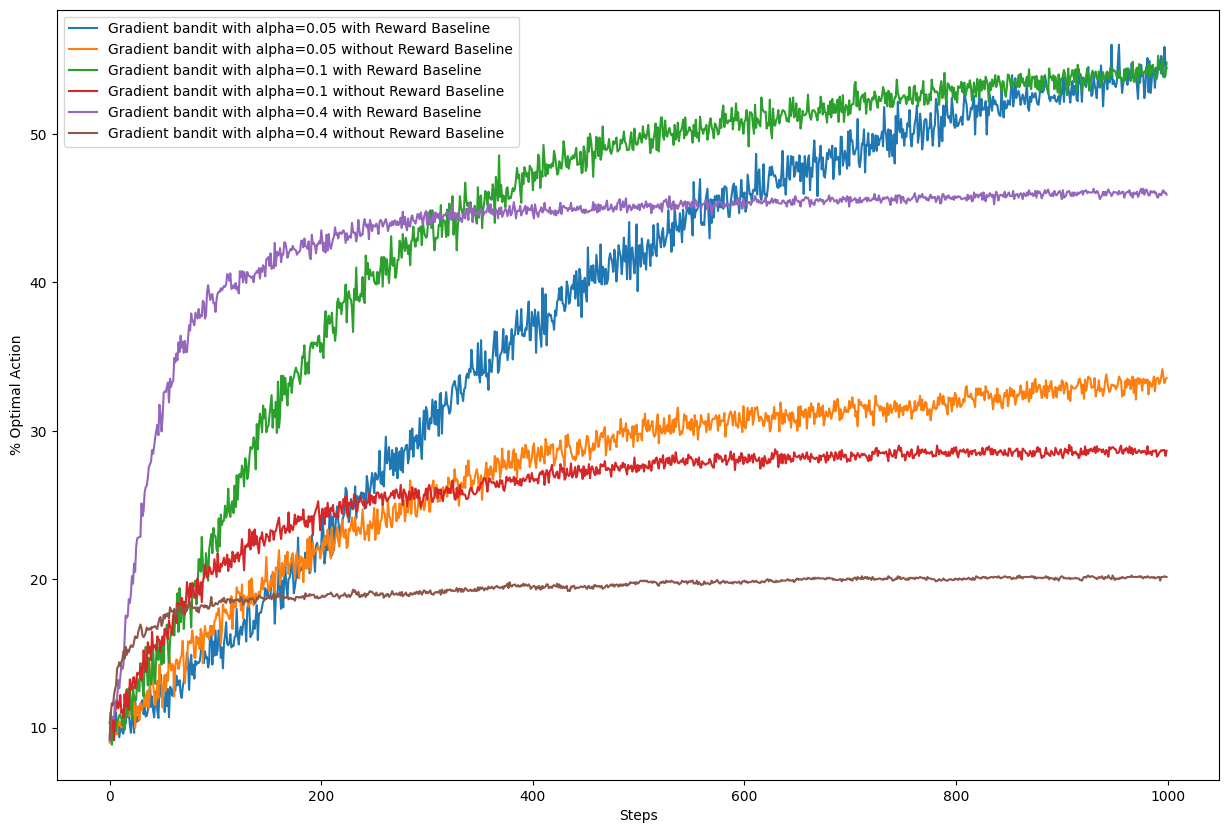

In [396]:
#Plot
for experiment_result_key in optimal_action_perc_dict.keys():
    print(experiment_result_key)
    data = optimal_action_perc_dict[experiment_result_key]
    plt.plot(data,label=experiment_result_key);
    plt.ylabel("% Optimal Action")
    plt.xlabel("Steps")
    plt.legend();